Numpy 是 Python 专门处理高维数组 (high dimensional array) 的计算的包，每次使用它遇到问题都会它的官网 (www.numpy.org). 去找答案。 在使用 numpy 之前，需要引进它，语法如下：

In [1]:
import numpy

这样你就可以用 numpy 里面所有的内置方法 (build-in methods) 了，比如求和与均值。

In [2]:
numpy.sum()
numpy.mean()

TypeError: sum() missing 1 required positional argument: 'a'

但是每次写 numpy 字数有点多，通常我们给 numpy 起个别名 np，用以下语法，这样所有出现 numpy 的地方都可以用 np 替代。

In [17]:
import numpy as np

为什么要专门学习数组呢？看下面「numpy 数组」和「列表」之间的计算效率对比：两个大小都是 1000000，把每个元素翻倍，运行 10 次用 %time 记时。

In [4]:
my_arr = np.arange(1000000)
my_list = list(range(1000000))

In [5]:
%time for _ in range(10): my_arr2 = my_arr * 2

Wall time: 31.9 ms


In [6]:
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

Wall time: 883 ms


我们发现「numpy 数组」效率是「列表」效率的 27 (883/31.9) 倍左右。如果元素全是数值型变量 (numerical variable)，那么 numpy 数组明显是个很好的数据结构。

学习 numpy 还是遵循的 Python 里「万物皆对象」的原则，既然把数组当对象，我们就按着 **数组的创建、数组的存载、数组的获取、数组的变形、和数组的计算** 来盘一盘 NumPy，目录如下：
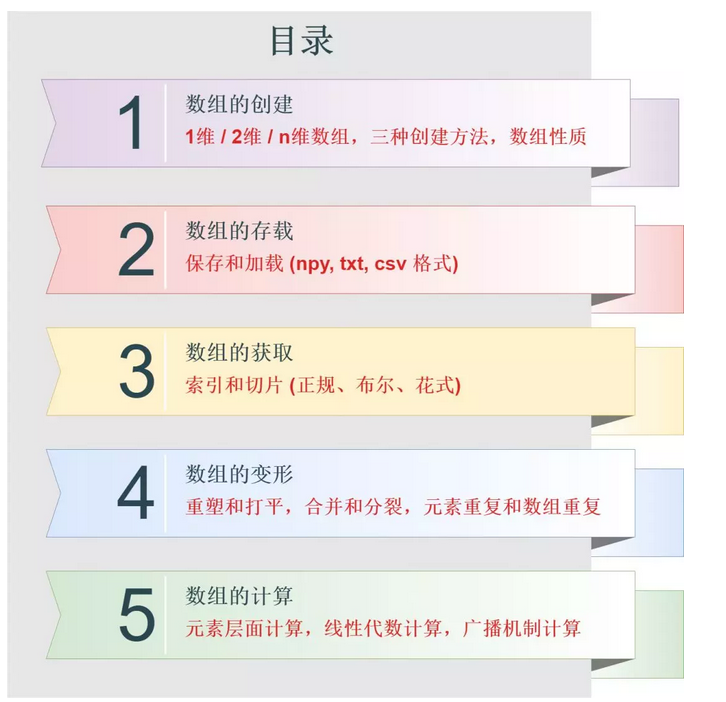
有些读者可能会说，NumPy 都什么好学的，数组都弄不懂的人还能干什么，那我来问你个问题，知道「转置操作」吧，那么下面这个二维数组转置后是什么？


In [8]:
arr = np.array([[1,2,3],[4,5,6]])
arr

array([[1, 2, 3],
       [4, 5, 6]])

太简单了，是 [[1,4], [2,5], [3,6]]，来看看是不是。

In [9]:
arr.T

array([[1, 4],
       [2, 5],
       [3, 6]])

答对了，你牛，再看一道转置的题

In [10]:
arr = np.arange(16).reshape((2, 2, 4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

等等，现在有三维，转置通常不是转两个维度吗？转三个维度也可以？当然，比如把第 1, 2, 3 维度转置到第 2, 1, 3 维度，可以用 transpose 函数。

In [11]:
arr.transpose(1, 0, 2)

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

如果不知道上面答案怎么来的，我觉得你还是有必要看看本帖的。由于篇幅原因，NumPy 系列也分两贴，上贴讲前三节的内容，下帖讲后两节的内容。

## 数组的创建

### 1.1 初次印象
数组 (array) 是相同类型的元素 (element) 的集合所组成数据结构 (data structure)。numpy 数组中的元素用的最多是「数值型」元素，平时我们说的一维、二维、三维数组长下面这个样子 (对应着线、面、体)。四维数组很难被可视化。

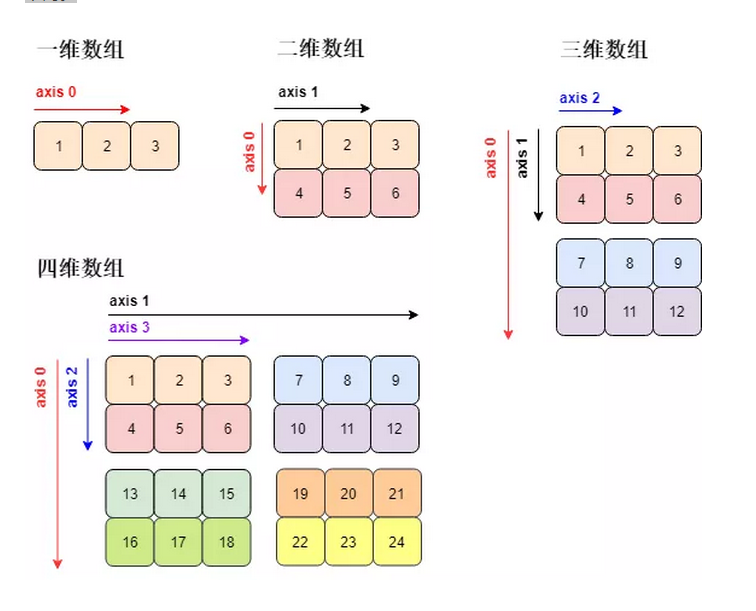
注意一个关键字 axis，中文叫「轴」，一个数组是多少维度就有多少根轴。由于 Python 计数都是从 0 开始的，那么

* 第 1 维度 = axis 0
* 第 2 维度 = axis 1
* 第 3 维度 = axis 2

但这些数组只可能在平面上打印出来，那么它们 (高于二维的数组) 的表现形式稍微有些不同。

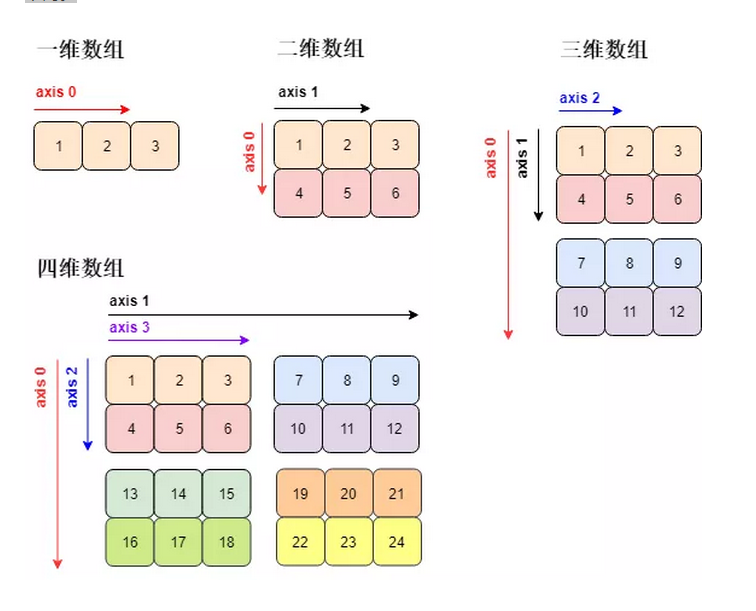
分析上图各个数组的在不同维度上的元素：

* 一维数组：轴 0 有 3 个元素
* 二维数组：轴 0 有 2 个元素，轴 1 有 3 个元素
* 三维数组：轴 0 有 2 个元素 (2 块)，轴 1 有 2 个元素，轴 2 有 3 个元素
* 四维数组：轴 0 有 2 个元素 (2 块)，轴 1 有 2 个元素 (2 块)，轴 2 有 2 个元素，轴 3 有 3 个元素

### 1.2 创建数组
带着上面这个对轴的认识，接下来我们用代码来创建 numpy 数组，有三种方式：

1. 按步就班的 np.array() 用在列表和元组上 
2. 定隔定点的 np.arange() 和 np.linspace()
3. 一步登天的 np.ones(), np.zeros(), np.eye() 和 np.random.random()

#### 按部就班法
给了【列表】和【元组】原材料，用np.array()包装一下得到numpy数组

In [12]:
l = [3.5, 5, 2, 8, 4.2]
np.array(l)

array([3.5, 5. , 2. , 8. , 4.2])

In [13]:
t = (3.5, 5, 2, 8, 4.2)
np.array(t)

array([3.5, 5. , 2. , 8. , 4.2])

注意，numpy 数组的输出都带有 array() 的字样，里面的元素用「中括号 []」框住。

#### 定隔定点法
更常见的两种创建 numpy 数组方法：

* 定隔的 arange：固定元素大小间隔
* 定点的 linspace：固定元素个数

先看 arange 例子：

In [15]:
print(np.arange(8))
print(np.arange(2, 8))
print(np.arange(2, 8, 2))

[0 1 2 3 4 5 6 7]
[2 3 4 5 6 7]
[2 4 6]


函数 arange 的参数为 **起点 , 终点 , 间隔**

`arange(start, stop, step)`
其中 **stop** 必须要有， **start** 和 **step** 没有的话默认为1.对着这个规则可以看一下上面的输出。

* **注：**
用函数print打印numpy数组就没有array字样了，只用其内容，而且元素之间的【逗号】也没有了

再看linspace例子：

In [20]:
print(np.linspace(2, 6, 3))
print(np.linspace(3, 8, 11))

[2. 4. 6.]
[3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8. ]


函数 linspace 的参数为 **起点 , 终点 , 点数**

`    linspace (start , stop , num)`

其中 start 和 stop 必须要有，num 没有的话默认为 50。对着这个规则看看上面各种情况的输出。

#### 一步登天法
NumPy 还提供一次性

* 用 zeros() 创建全是 0 的 n 维数组
* 用 ones() 创建全是 1 的 n 维数组
* 用 random() 创建随机 n 维数组
* 用 eye() 创建对角矩阵 (二维数组)

对于前三种，由于输出是 n 为数组，它们的参数是一个「标量」或「元组类型的形状」，下面三个例子一看就懂了：

In [22]:
print(np.zeros(5))  # 标量5代表形状(5,)
print(np.ones((2, 3)))
print(np.random.random((2, 3, 4)))

[0. 0. 0. 0. 0.]
[[1. 1. 1.]
 [1. 1. 1.]]
[[[0.66477833 0.30549451 0.62187977 0.37976028]
  [0.17458506 0.10953346 0.38955298 0.78401126]
  [0.65503343 0.10568841 0.90538972 0.20005101]]

 [[0.06706699 0.5073724  0.56299511 0.0663232 ]
  [0.97461269 0.73994244 0.72334045 0.26097898]
  [0.79968371 0.70074534 0.26643951 0.89783998]]]


对于函数 eye()，它的参数就是一个标量，控制矩阵的行数或列数：

In [23]:
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

此外还可以设定 eye() 里面的参数 k

* 默认设置 k = 0 代表 1 落在对角线上
* k = 1 代表 1 落在对角线右上方
* k = -1 代表 1 落在对角线左下方

In [24]:
np.eye(4, k=1)

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 0.]])

### 1.3 数组性质
还记得 Python 里面「万物皆对象」么？numpy 数组也不例外，那么我们来看看数组有什么属性 (attributes) 和方法 (methods)。

#### 一维数组
用按步就班的 np.array() 带列表生成数组 arr

In [25]:
arr = np.array([3.5, 5, 2, 8, 4.2])
arr

array([3.5, 5. , 2. , 8. , 4.2])

现在你应该会用 dir(arr) 来查看数组的属性了吧，看完之后我们对 type, ndim, len(), size, shape, stride, dtype 几个感兴趣，一把梭打印出来看看：

In [29]:
# print(dir(arr))
print('The type is ', type(arr))
print( 'The dimension is', arr.ndim )
print( 'The length of array is', len(arr) )
print( 'The number of elements is', arr.size )
print( 'The shape of array is', arr.shape )
print( 'The stride of array is', arr.strides )
print( 'The type of elements is', arr.dtype )

The type is  <class 'numpy.ndarray'>
The dimension is 1
The length of array is 5
The number of elements is 5
The shape of array is (5,)
The stride of array is (8,)
The type of elements is float64


根据结果我们来看看上面属性到底是啥：
* type：数组类型，当然是 numpy.ndarray
* ndim：维度个数是 1
* len()：数组长度为 5 (注意这个说法只对一维数组有意义)
* size：数组元素个数为 5
* shape：数组形状，即每个维度的元素个数 (用元组来表示)，只有一维，元素个数为 5，写成元组形式是 (5,)
* **strides：跨度，即在某一维度下为了获取到下一个元素需要「跨过」的字节数 (用元组来表示)，float64 是 8 个字节数 (bytes)，因此跨度为 8**
* dtype：数组元素类型，是双精度浮点 (注意和 type 区分)

注意我加粗了 **strides**，这个概念对于解决引言的「转置高维数组」问题很重要。一图胜千言。
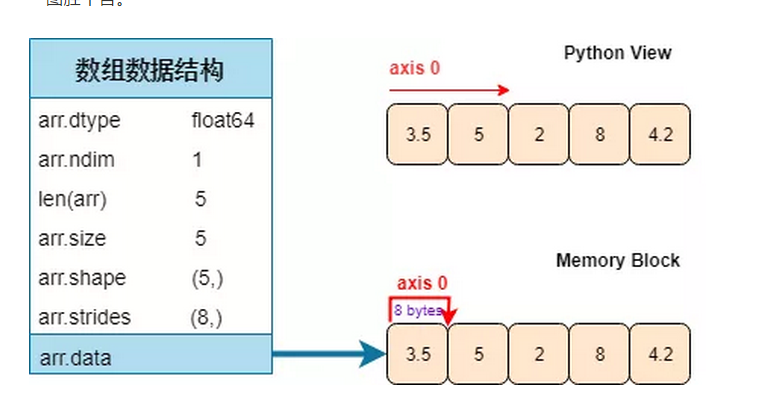
为什么有个 Python View 和 Memory Block 啊？这两个不是一样的么？对一维数组来说，「Python 视图」看它和「内存块」存储它的形式是一样的，但对二维数组甚至高维数组呢？

#### 二维数组
还是用按步就班的 np.array() 带二维列表生成二维数组 arr2d

In [30]:
l2 = [[1, 2, 3], [4, 5, 6]]
arr2d = np.array(l2)
arr2d

array([[1, 2, 3],
       [4, 5, 6]])

一把梭打印属性出来看看：

In [31]:
print( 'The type is', type(arr2d) )
print( 'The dimension is', arr2d.ndim )
print( 'The length of array is', len(arr2d) )
print( 'The number of elements is', arr2d.size )
print( 'The shape of array is', arr2d.shape )
print( 'The stride of array is', arr2d.strides )
print( 'The type of elements is', arr2d.dtype )

The type is <class 'numpy.ndarray'>
The dimension is 2
The length of array is 2
The number of elements is 6
The shape of array is (2, 3)
The stride of array is (12, 4)
The type of elements is int32


同样，我们来分析一下上面属性：

* type：数组类型 numpy.ndarray
* ndim：维度个数是 2
* len()：数组长度为 2 (严格定义 len 是数组在「轴 0」的元素个数)
* size：数组元素个数为 6
* shape：数组形状 (2, 3）
* strides：跨度 (12, 4) 看完下图再解释
* dtype：数组元素类型 int32

对于二维数组，Python 视图」看它和「内存块」存储它的形式是不一样的，如下图所示：

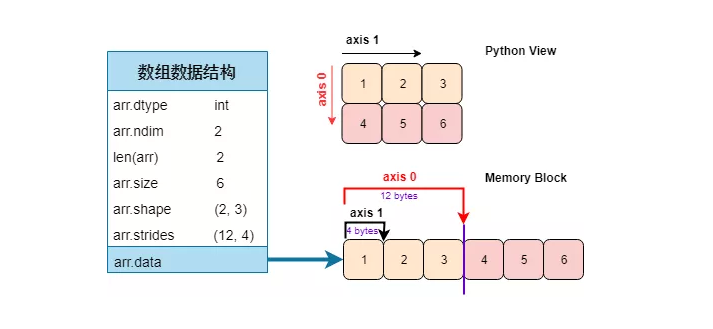
在 numpy 数组中，默认的是行主序 (row-major order)，意思就是每行的元素在内存块中彼此相邻，而列主序 (column-major order) 就是每列的元素在内存块中彼此相邻。

回顾跨度 (stride) 的定义，即在某一维度下为了获取到下一个元素需要「跨过」的字节数。注：每一个 int32 元素是 4 个字节数。对着上图：

* 第一维度 (轴 0)：沿着它获取下一个元素需要跨过 3 个元素，即 12 = 3×4 个字节
* 第二维度 (轴 1)：沿着它获取下一个元素需要跨过 1 个元素，即 4 = 1×4 个字节

因此该二维数组的跨度为 (12, 4)。

#### n维数组
用 np.random.random() 来生成一个多维数组：

In [33]:
arr4d = np.random.random((2, 2, 2, 3))
arr4d

array([[[[0.64540211, 0.5970869 , 0.12768048],
         [0.52374564, 0.12995096, 0.63609478]],

        [[0.44775121, 0.39796942, 0.8460179 ],
         [0.31268787, 0.43623654, 0.26223268]]],


       [[[0.04708059, 0.15010069, 0.60780145],
         [0.55709004, 0.84729842, 0.22642576]],

        [[0.29983293, 0.84328681, 0.92096632],
         [0.74673469, 0.66633778, 0.24008784]]]])

里面具体元素是什么不重要，一把梭 arr4d 的属性比较重要：

In [34]:
print( 'The type is', type(arr4d) )
print( 'The dimension is', arr4d.ndim )
print( 'The length of array is', len(arr4d) )
print( 'The number of elements is', arr4d.size )
print( 'The shape of array is', arr4d.shape )
print( 'The stride of array is', arr4d.strides )
print( 'The type of elements is', arr4d.dtype )

The type is <class 'numpy.ndarray'>
The dimension is 4
The length of array is 2
The number of elements is 24
The shape of array is (2, 2, 2, 3)
The stride of array is (96, 48, 24, 8)
The type of elements is float64


除了 stride，都好理解，请根据下图好好想想为什么 stride 是 (96, 48, 24, 8)？[Hint: 一个 float64 的元素占 8 个字节]
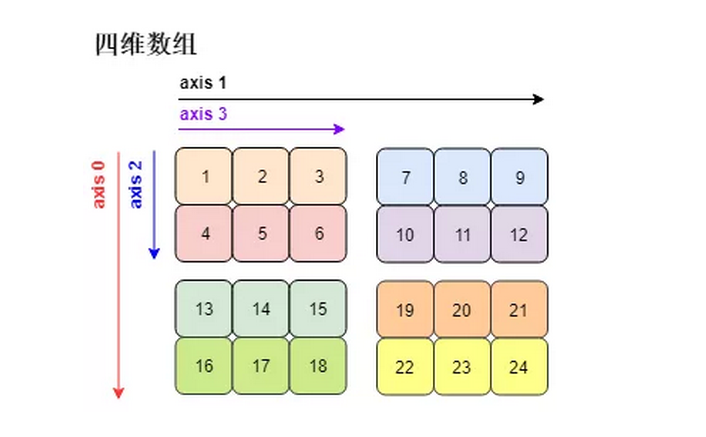

回顾跨度 (stride) 的定义，即在某一维度下为了获取到下一个元素需要「跨过」的字节数。注：每一个 float64 元素是 8 个字节数

* 第一维度 (轴 0)：沿着它获取下一个元素需要跨过 12 个元素，即 96 = 12×8 个字节
* 第二维度 (轴 1)：沿着它获取下一个元素需要跨过 6 个元素，即 48 = 6×8 个字节
* 第三维度 (轴 2)：沿着它获取下一个元素需要跨过 3 个元素，即 24 = 3×8 个字节
* 第四维度 (轴 3)：沿着它获取下一个元素需要跨过 1 个元素，即 8 = 1×8 个字节

因此该四维数组的跨度为 (96, 48, 24, 8)。

留一道思考题，strides 和 shape 有什么关系？

    strides = (96, 48, 24, 8)
    shape = (2, 2, 2, 3)

总不能每个高维数组都用可视化的方法来算 strides 把。

## 2 数组的存载
本节讲数组的「保存」和「加载」，我知道它们没什么技术含量，但是很重要。假设你已经训练完一个深度神经网络，该网络就是用无数参数来表示的。比如权重都是 numpy 数组，为了下次不用训练而重复使用，将其保存成 .npy 格式或者 .csv 格式是非常重要的。

#### numpy自身的.npy格式
用 np.save 函数将 numpy 数组保存为 .npy 格式，具体写法如下：

    np.save( "文件名"，数组 )

In [35]:
arr_disk = np.arange(8)
np.save("arr_disk", arr_disk)
arr_disk

array([0, 1, 2, 3, 4, 5, 6, 7])

arr_disk.npy 保存在 Jupyter Notebook 所在的根目录下。要加载它也很简单，用 np.load( "文件名" ) 即可：

In [36]:
np.load("arr_disk.npy")

array([0, 1, 2, 3, 4, 5, 6, 7])

#### 文本 .txt 格式
用 np.savetxt 函数将 numpy 数组保存为 .txt 格式，具体写法如下：

    np.save( ‘’文件名”，数组 )

In [37]:
arr_text = np.array([[1., 2., 3.], [4., 5., 6.]])
np.savetxt("arr_from_text.txt", arr_text)

arr_from_text.txt 保存在 Jupyter Notebook 所在的根目录下，打开看里面确实存储着 [[1,2,3], [4,5,6]]。
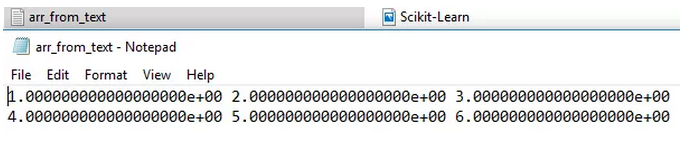
用 np.loadtxt( "文件名" ) 即可加载该文件

In [38]:
np.loadtxt("arr_from_text.txt")

array([[1., 2., 3.],
       [4., 5., 6.]])

#### 文本 .csv 格式
另外，假设我们已经在 arr_from_csv 的 csv 文件里写进去了 [[1,2,3], [4,5,6]]，每行的元素是由「分号 ;」来分隔的，展示如下：
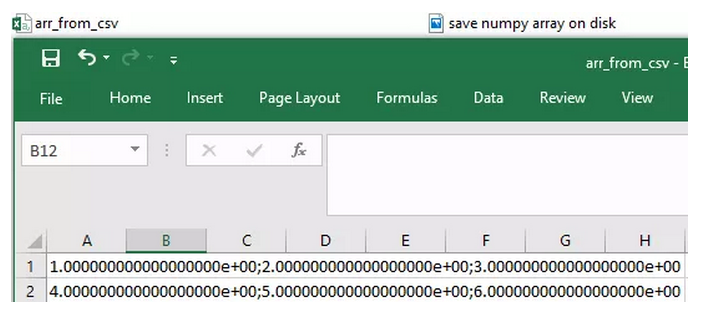
用 np.genfromtxt( "文件名" ) 即可加载该文件

`np.genfromtxt("arr_from_csv.csv")`

>array([nan, nan])

奇怪的是数组里面都是 nan，原因是没有设定好「分隔符 ;」，那么函数 genfromtxt 读取的两个元素是
* 1;2;3
* 4;5;6

它们当然不是数字拉，Numpy 只能用两个 nan (Not a Number) 来代表上面的四不像了。

带上「分隔符 ;」再用 np.genfromtxt( "文件名"，分隔符 ) 即可加载该文件

`np.genfromtxt("arr_from_csv.csv", delimiter=";")`
>array([[1., 2., 3.],
       [4., 5., 6.]])


## 3 数组的获取
获取数组是通过索引 (indexing) 和切片 (slicing) 来完成的，

* 切片是获取一段特定位置的元素
* 索引是获取一个特定位置的元素

索引和切片的方式和列表一模一样，参考 Python 入门篇 (上) 的 2.3 节。对于一维数组 arr,

* 切片写法是 arr[start : stop : step]
* 索引写法是 arr[index]

因此，切片的操作是可以用索引操作来实现的 (一个一个总能凑成一段)，只是没必要罢了。为了简化，我们在本章三节标题里把切片和索引都叫做索引。

索引数组有三种形式，正规索引 (normal indexing)、布尔索引 (boolean indexing) 和花式索引 (fancy indexing)。

### 3.1 正规索引
虽然切片操作可以由多次索引操作替代，但两者最大的区别在于

* 切片得到的是原数组的一个视图 (view) ，修改切片中的内容会改变原数组
* 索引得到的是原数组的一个复制 (copy)，修改索引中的内容不会改变原数组

请看下面一维数组的例子来说明上述两者的不同。

#### 一维数组


In [41]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

用 arr[6] 索引第 7 个元素 (记住 Python 是从 0 开始记录位置的)

In [43]:
arr[6]

6

把它赋给变量 a，并重新给 a 赋值 1000，但是元数组 arr 第 7 个元素的值还是 6，并没有改成 1000。


In [44]:
a = arr[6]
a = 1000
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

用 arr[5:8] 切片第 6 到 8 元素 (记住 Python 切片包头不包尾)


In [45]:
arr[5:8]

array([5, 6, 7])

把它赋给变量 b，并重新给 b 的第二个元素赋值 12，再看发现元数组 arr 第 7 个元素的值已经变成 12 了。

In [46]:
b = arr[5:8]
b[1] = 12
arr

array([ 0,  1,  2,  3,  4,  5, 12,  7,  8,  9])

这就证实了切片得到原数组的视图 (view)，更改切片数据会更改原数组，而索引得到原数组的复制 (copy)， 更改索引数据不会更改原数组。希望用下面一张图可以明晰 view 和 copy 的关系。

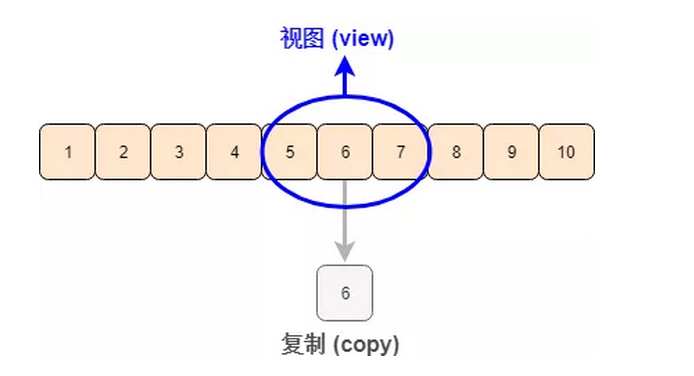

了解完一维数组的切片和索引，类比到二维和多维数组上非常简单。

#### 二维数组


In [48]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d


array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

* 索引

情况一：用 arr2d[2] 来索引第三行，更严格的说法是索引「轴 0」上的第三个元素。

In [50]:
arr2d[2]

array([7, 8, 9])

情况二：用 arr2d[0][2] 来索引第一行第三列

In [51]:
arr2d[0][2]

3

索引二维数组打了两个中括号好麻烦，索引五维数组不是要打了五个中括号？还有一个简易方法，用 arr2d[0, 2] 也可以索引第一行第三列

In [52]:
arr2d[0,2]

3

* 切片

情况一：用 arr2d[:2] 切片前两行，更严格的说法是索引「轴 0」上的前两个元素。

In [53]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

情况二：用 arr2d[:, [0,2]] 切片第一列和第三列

In [54]:
arr2d[:, [0,2]]

array([[1, 3],
       [4, 6],
       [7, 9]])

情况三：用 arr2d[1, :2] 切片第二行的前两个元素

In [55]:
arr2d[1, :2]

array([4, 5])

情况四：用 arr2d[:2, 2] 切片第三列的前两个元素

In [56]:
arr2d[:2, 2]

array([3, 6])

### 3.2布尔索引
布尔索引，就是用一个由布尔 (boolean) 类型值组成的数组来选择元素的方法。

假设我们有阿里巴巴 (BABA)，脸书 (FB) 和京东 (JD) 的

* 股票代码 code 数组
* 股票价格 price 数组：每行记录一天开盘，最高和收盘价格。


In [65]:
code = np.array(['BABA', 'FB', 'JD', 'BABA', 'JD', 'FB'])
price = np.array([[170,177,169],[150,159,153],
                  [24,27,26],[165,170,167],
                  [22,23,20],[155,116,157]])
price

array([[170, 177, 169],
       [150, 159, 153],
       [ 24,  27,  26],
       [165, 170, 167],
       [ 22,  23,  20],
       [155, 116, 157]])

假设我们想找出 BABA 对应的股价，首先找到 code 里面是 'BABA' 对应的索引 (布尔索引)，即一个值为 True 和 False 的布尔数组。

In [66]:
code == 'BABA'

array([ True, False, False,  True, False, False])

用该索引可以获取 BABA 的股价：

In [67]:
price[code == 'BABA']

array([[170, 177, 169],
       [165, 170, 167]])

该索引还可以获取 BABA 的最高和收盘价格：

In [68]:
price[code == 'BABA', 1: ]

array([[177, 169],
       [170, 167]])

再试试获取 JD 和 FB 的股价：

In [69]:
price[ (code == 'FB')|(code == 'JD') ]

array([[150, 159, 153],
       [ 24,  27,  26],
       [ 22,  23,  20],
       [155, 116, 157]])

虽然下面操作没有实际意义，试试把股价小于 25 的清零。

In [70]:
price[ price < 25 ] = 0
price

array([[170, 177, 169],
       [150, 159, 153],
       [  0,  27,  26],
       [165, 170, 167],
       [  0,   0,   0],
       [155, 116, 157]])

注：这种布尔索引的操作在 Pandas 更常用也更方便，看完 pandas 那帖后就可以忽略这一节了。

### 3.3 花式索引
花式索引是获取数组中想要的特定元素的有效方法。考虑下面数组：


In [71]:
arr = np.arange(32).reshape(8,4)
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

假设你想按特定顺序来获取第 5, 4 和 7 行时，用 arr[ [4,3,6] ]


In [72]:
arr[[4,3,6]]

array([[16, 17, 18, 19],
       [12, 13, 14, 15],
       [24, 25, 26, 27]])

假设你想按特定顺序来获取倒数第 4, 3 和 6 行时 (即正数第 4, 5 和 2 行)，用 arr[ [-4,-3,-6] ]

In [73]:
arr[ [-4,-3,-6] ]

array([[16, 17, 18, 19],
       [20, 21, 22, 23],
       [ 8,  9, 10, 11]])

此外，你还能更灵活的设定「行」和「列」中不同的索引，如下

In [74]:
arr[ [1,5,7,2], [0,3,1,2] ]

array([ 4, 23, 29, 10])

检查一下，上行代码获取的分别是第二行第一列、第六行第四列、第八行第二列、第三行第三列的元素，它们确实是 4, 23, 29 和 10。如果不用花式索引，就要写下面繁琐但等价的代码：

In [75]:
np.array( [ arr[1,0], arr[5,3], 
            arr[7,1], arr[2,2] ] )

array([ 4, 23, 29, 10])

最后，我们可以把交换列，把原先的 [0,1,2,3] 的列换成 [0,3,1,2]。

In [76]:
arr[:,[0,3,1,2]] 

array([[ 0,  3,  1,  2],
       [ 4,  7,  5,  6],
       [ 8, 11,  9, 10],
       [12, 15, 13, 14],
       [16, 19, 17, 18],
       [20, 23, 21, 22],
       [24, 27, 25, 26],
       [28, 31, 29, 30]])

## 总结
本帖讨论了 NumPy 的前三节，数组创建、数组存载和数组获取。同样把 numpy 数组当成一个对象，要学习它，无非就是学习怎么

创建它：按步就班法、定隔定点法、一步登天法
存载它：保存成 .npy, .txt 和 .csv 格式，下次加载即用
获取它：一段用切片，一个用索引；有正规法、布尔法、花式法

等等，你好像还没教什么 numpy 数组硬核的东西呢，下帖讨论 NumPy 的后两节就教怎么

变形它：重塑和打平，合并和分裂，元素重复和数组重复
计算它：元素层面计算，线性代数计算，广播机制计算


回到引言的「数组转置」问题：

In [77]:
arr = np.arange(16).reshape((2, 2, 4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

将第 1, 2, 3 维度转置到第 2, 1, 3 维度，即将轴 0, 1, 2 转置到轴 1, 0, 2。

解答：
数组转置的本质：交换每个轴 (axis) 的形状 (shape) 和跨度 (stride)。

四幅图解决问题：
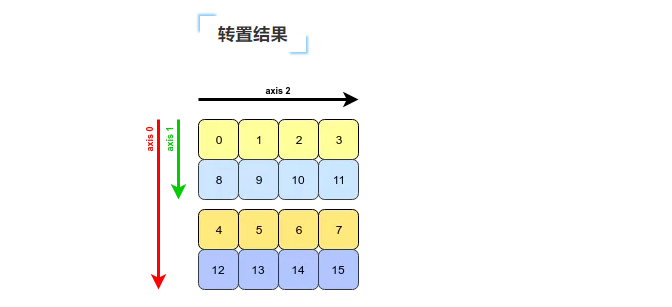

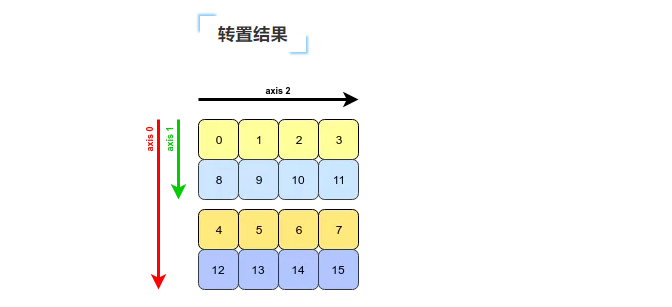

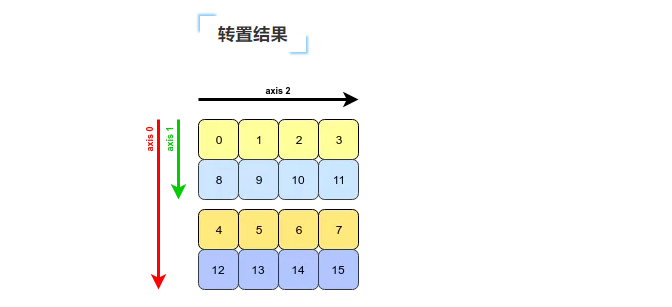

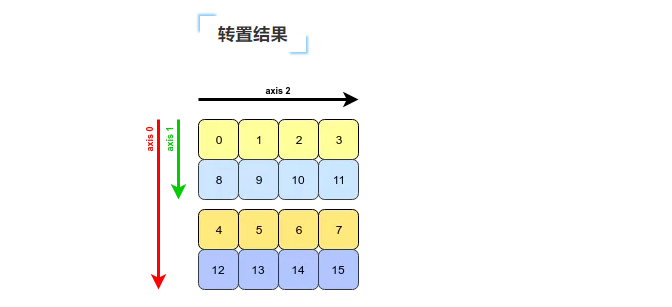

用代码验证：

In [78]:
arr.transpose(1,0,2)

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

欧了！下篇讨论 NumPy 系列的「数组的变性」和「数组的计算」